In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading the data
url='https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/slump/slump_test.data'

In [3]:
data=pd.read_csv(url, index_col=0)

In [ ]:
data.head()

In [ ]:

#exploratory data analysis
print(data.shape)

In [ ]:
#The dataset contains 103 observations and data on 10 variables

In [ ]:
print(data.info())

In [ ]:
#The data does not have any variables with missing or null values and all variables are numeric

In [4]:
print(data.columns)
data = data.rename(columns = {'Compressive Strength (28-day)(Mpa)': 'CS'})

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')


In [5]:
data['CS'].value_counts()

41.27    2
34.99    2
33.51    2
26.42    2
42.08    2
44.08    2
33.78    2
41.14    2
36.19    2
30.43    2
32.71    2
35.52    2
30.97    2
41.01    2
29.77    2
37.39    2
28.29    2
38.46    2
52.65    2
41.81    2
41.54    1
33.91    1
38.19    1
38.86    1
49.97    1
39.40    1
32.57    1
38.59    1
17.19    1
36.59    1
        ..
19.19    1
36.32    1
18.52    1
34.18    1
36.46    1
34.45    1
43.01    1
26.28    1
35.66    1
46.36    1
18.26    1
43.54    1
45.69    1
35.39    1
29.63    1
50.23    1
29.23    1
37.66    1
33.38    1
36.72    1
28.03    1
31.77    1
33.11    1
39.93    1
45.82    1
26.82    1
34.05    1
43.95    1
49.30    1
31.50    1
Name: CS, Length: 83, dtype: int64

In [ ]:
data.describe()

In [ ]:
#The mean is less than the median for Cement, slag, Fly ash, fine Aggr, Slump and Flow
#There maybe some outliers which can be better detected in graphs

In [ ]:
#All the dependent variables are continous

C:\Users\bhavna\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Frequency')

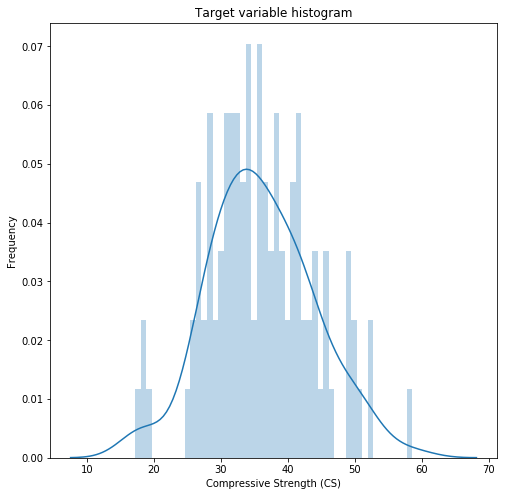

In [8]:
#visualizations of the dependent variables
plt.figure(figsize=(8, 8))
sns.distplot(data['CS'], bins=50, hist_kws={'alpha': 0.3});
plt.title('Target variable histogram')
plt.xlabel('Compressive Strength (CS)')
plt.ylabel('Frequency')

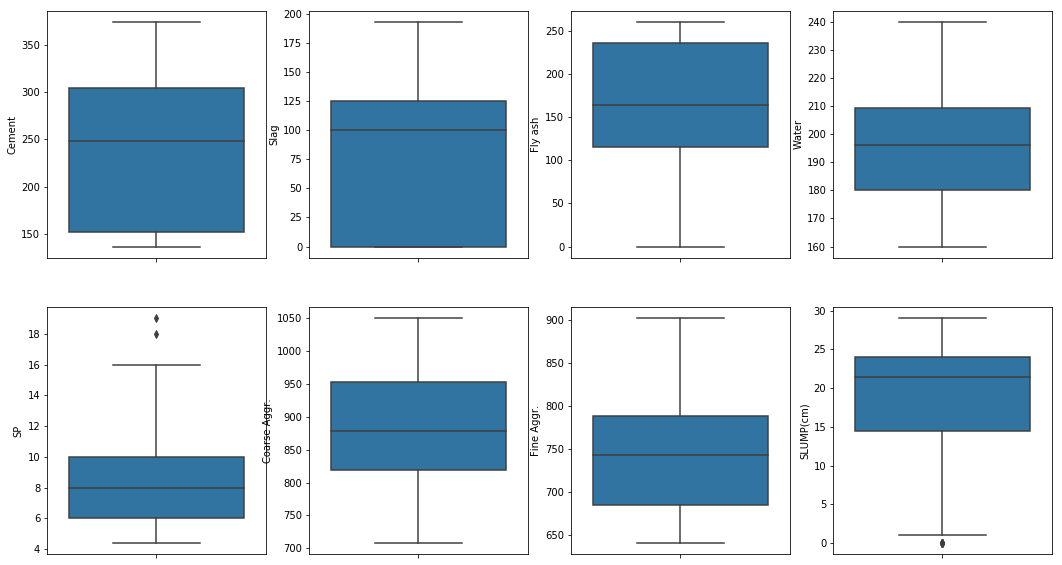

In [9]:
#The distribution of CS is almost symmetrical and there do not seem to be any outliers for this variables

# Plotting all the varibles to gauge characteristics
df=data.columns[:]
figs, axes = plt.subplots(round(len(df)/4), 4, figsize = (18, 10))
for i,n  in enumerate(figs.axes):
    sns.boxplot(x=df[i], data=data, ax=n, orient='v')



In [ ]:
#There are no outliers except for two pints in SP. There is high skewness in some variables and can be handled with data preprocessing or scaling depending on the modelbeing used

In [ ]:
# Answer 2


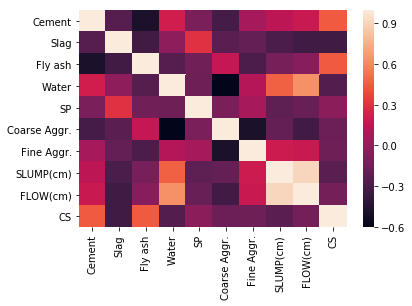

In [10]:
#correlation patterns in the data
correlation=data.corr()
sns.heatmap(correlation, xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values)





In [ ]:
# The heat map indicates that there is high correlation between variables such as:
#cement and Flyash, Cement and Coarse Aggr, Water and Coarse Aggr,Coarse Aggr and Fine Aggr. We have to be careful while desiging our model as we cannot use this variables together to avoid multicollinearity
# CS seems to be highly correlated with Cement,fly ash, Slag and water(negetively for slag and water).





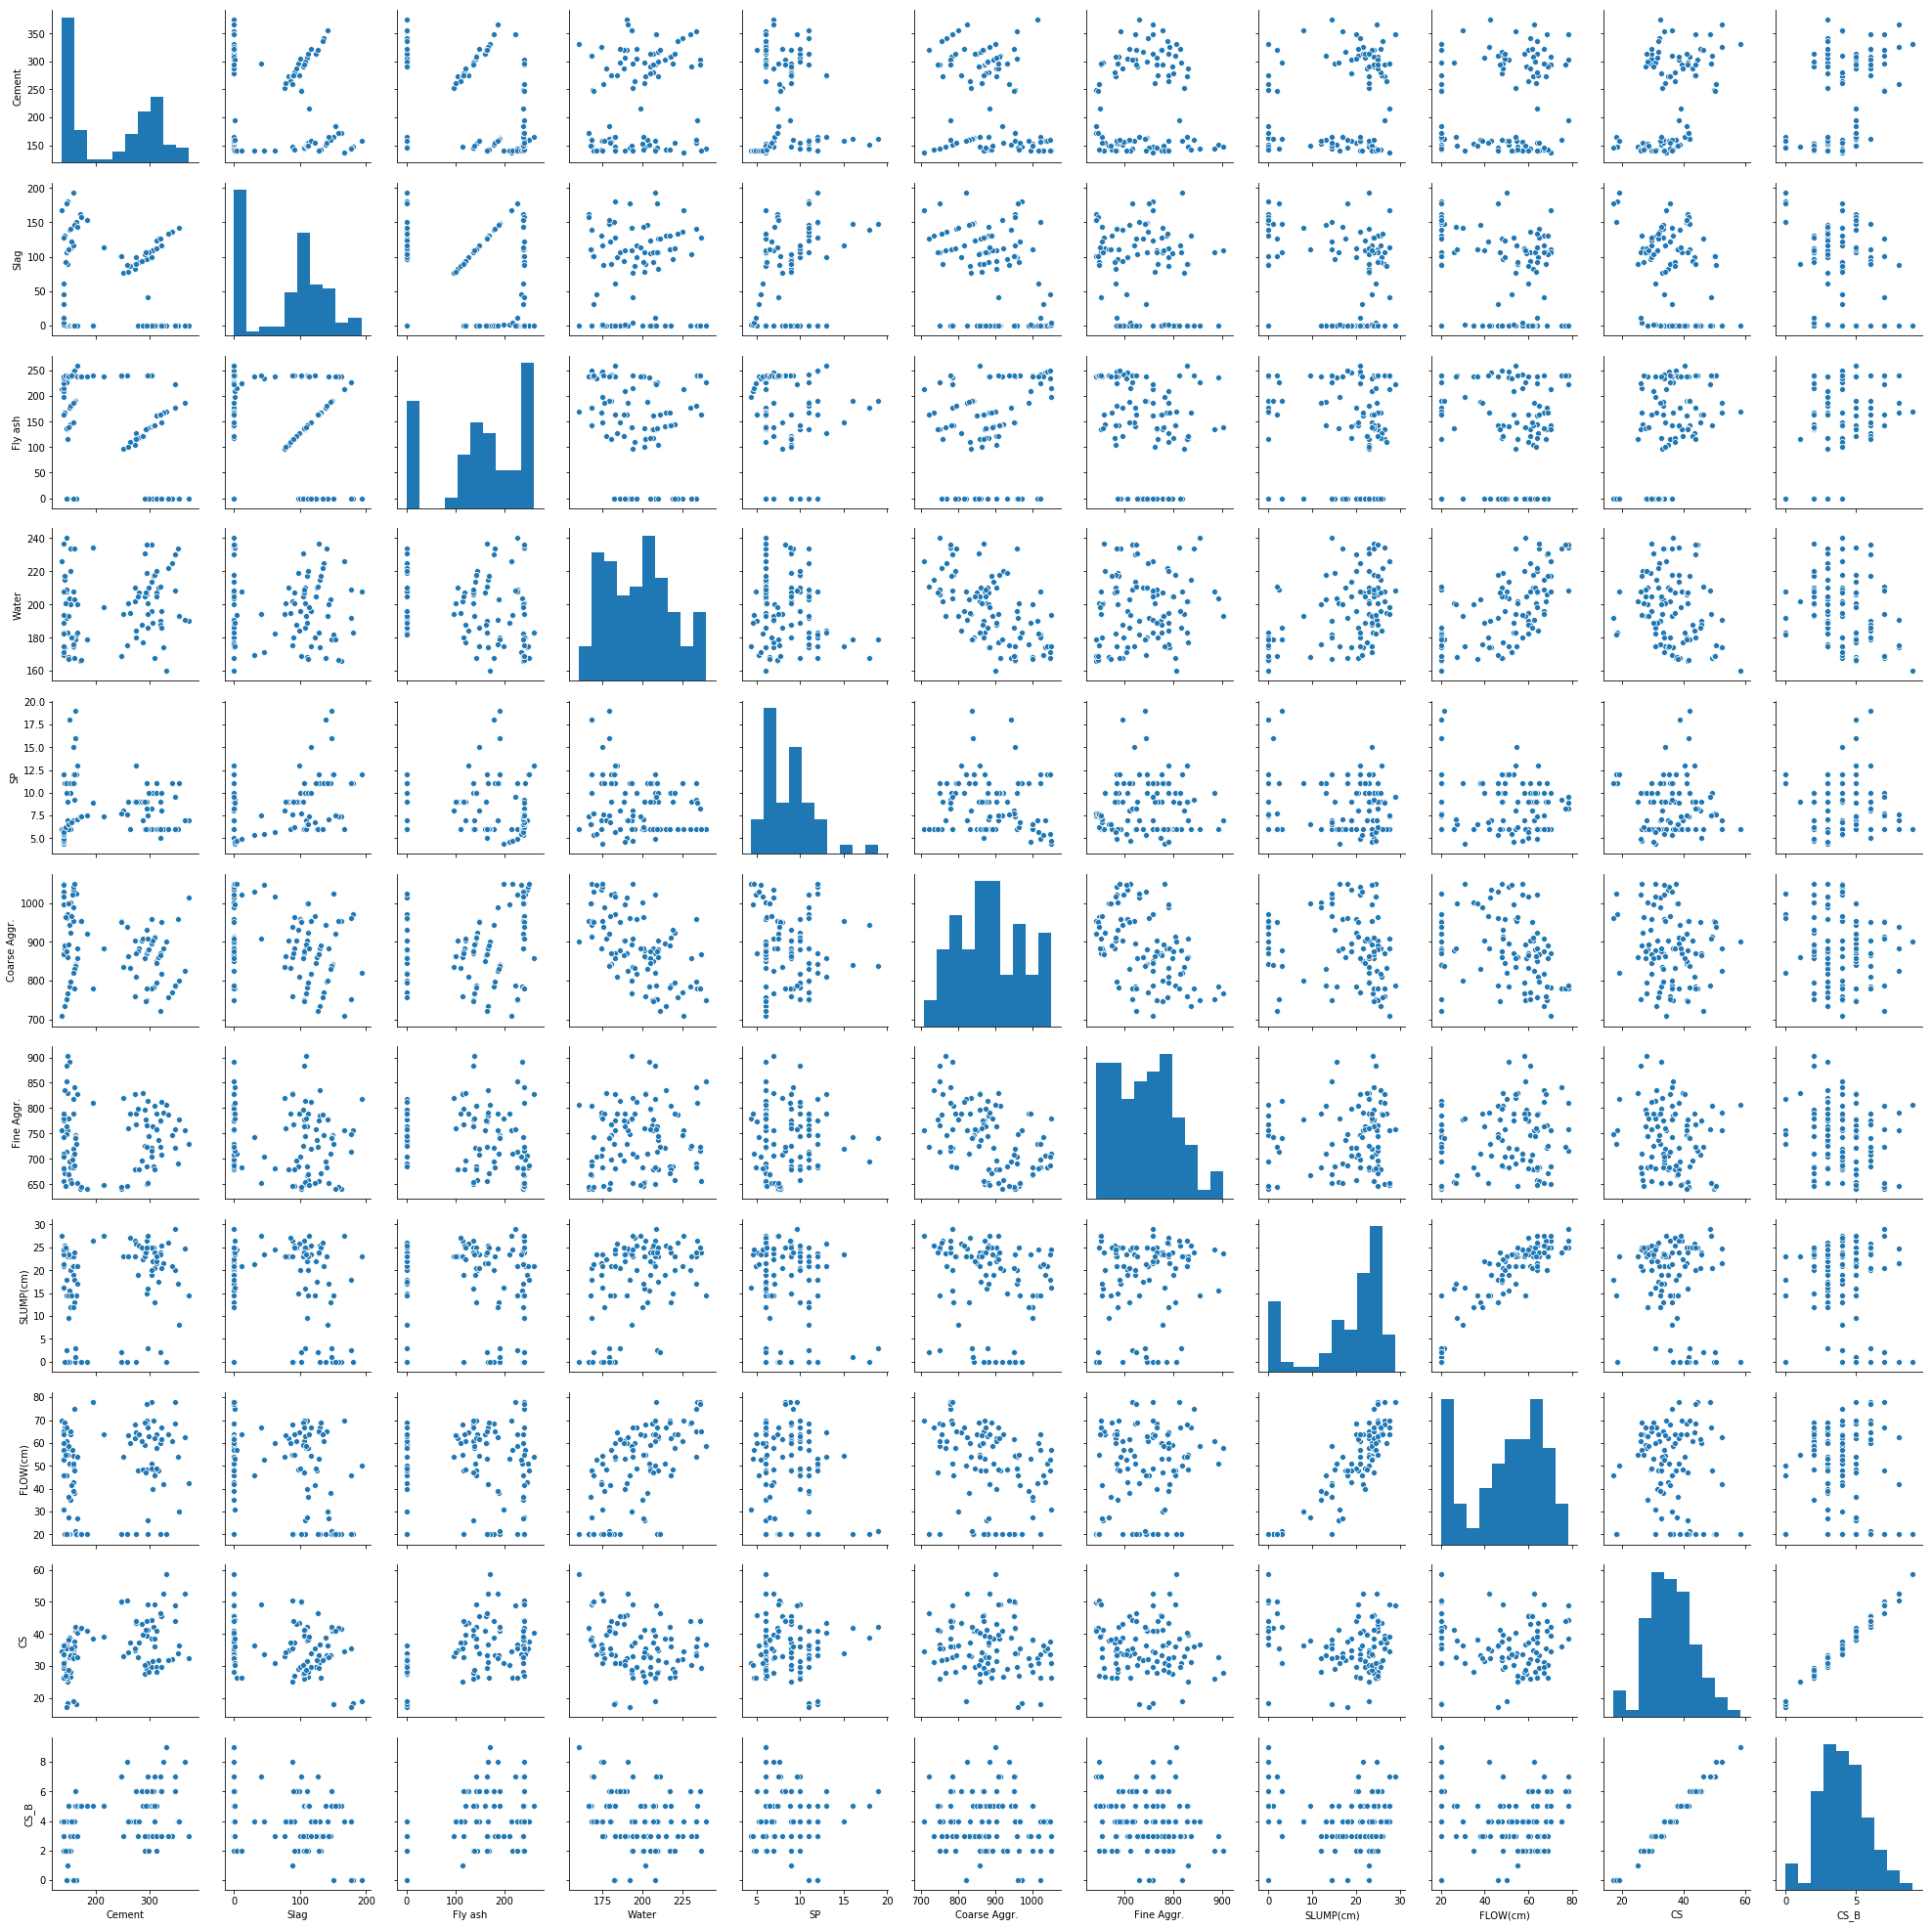

In [11]:
#Let's bin the target variable
data['CS_B'] = pd.cut(data['CS'], bins=10, labels=False).values  #binned CS values
sns.pairplot(data)


In [ ]:
#In the above figure the histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.
# Particular : When we look at the relationship between cs and fly ash we can see there is a upward sloping pattern which is suggestive of dependency between CS and Fly ash however when we look at SP and CS correlaion, there is no clear pattern and therfore it is safe to assume that CS and SP are not correlated
#From the histograms, we can also see that the fine aggr and SP are heavily right-skewed. In the instance of  using linear model they would have to be transformed by taking for example the logarithm of the value, to make it more normallu distributed. 

C:\Users\bhavna\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


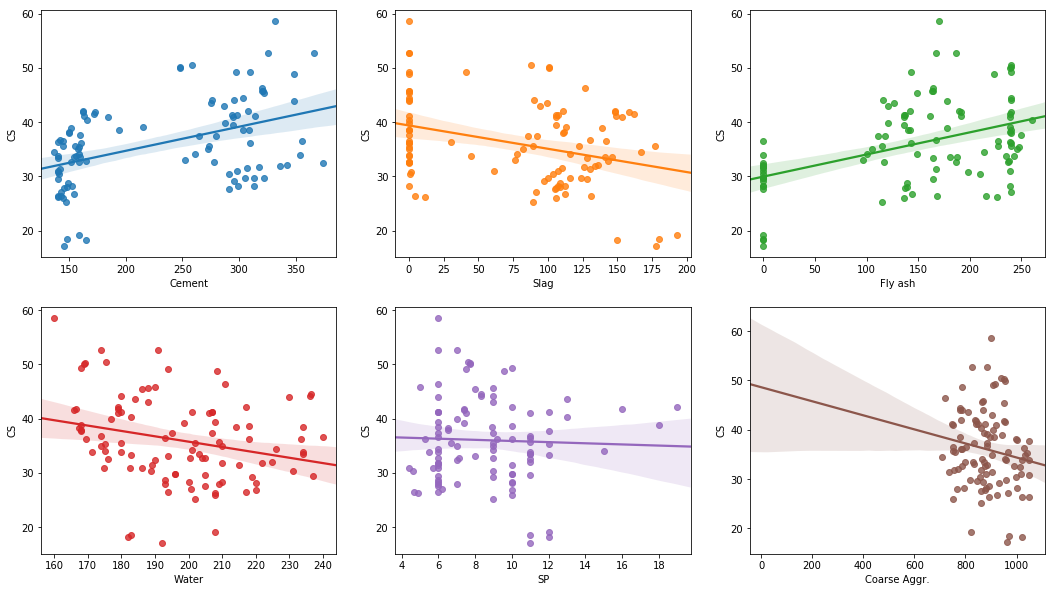

In [12]:
#plotting dependency between the Dependent variable(CS) and the explanatory variables
df_plot = data.columns[:7]
fig, axes = plt.subplots(round(len(df_plot) / 3), 3, figsize = (18, 10))

for i, n in enumerate(fig.axes):
    if i < len(df_plot) - 1:
        sns.regplot(x=df_plot[i],y='CS', data = data, ax=n)
    




In [13]:
# The graphs represent the linear dependency between CS and the independent variables. We can see that the relationship with Cement, Slag, Water And Flyash is well distributted and highly correlated
# to determine the highest correlation we can look at the last column of correlation table as it represents the correlation values for CS
correlation['CS']

Cement          0.445725
Slag           -0.331588
Fly ash         0.444393
Water          -0.254235
SP             -0.037871
Coarse Aggr.   -0.160684
Fine Aggr.     -0.154484
SLUMP(cm)      -0.223358
FLOW(cm)       -0.124029
CS              1.000000
Name: CS, dtype: float64

In [ ]:
# The two highest correlations are with 1. Water 2. Fly Ash. They are the most predictive of CS as there linear relationship is strong and well distributed

In [26]:
# Single Decision Tree model
y= data.iloc[:, 9].values # the dependent variable
x= data[['Water', 'Fly ash']] #independent variables
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.15, random_state=0)
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import SCORERS

In [27]:


Model_results=[]
test_results=[]
depth=[]
for i in range(1, 10):
    classifier=DecisionTreeRegressor(max_depth=i, min_samples_split=2, min_samples_leaf=2)
    classifier.fit(X_train, y_train)
    sc= cross_val_score(classifier, X_train, y_train, cv=10, scoring='r2')
    y_pred=classifier.predict(X_test)
    Model_results.append((i, sc.mean()))
    depth.append(sc.mean())
    test_results.append(r2_score(y_test, y_pred))
print (Model_results)

[(1, -0.02110599612849139), (2, 0.0654721473122375), (3, -0.0836986056126803), (4, -0.13503141390279497), (5, -0.3453150231451215), (6, -0.5972346454540896), (7, -0.7047640435200357), (8, -0.7615077066354567), (9, -0.7205324104966818)]


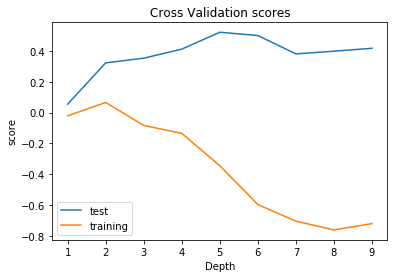

In [28]:
plt.plot(range(1,10),test_results, label='test')
plt.plot(range(1,10),depth, label = 'training')
plt.title('Cross Validation scores')
plt.xlabel('Depth')
plt.ylabel('score')
plt.legend()


In [43]:
# we base the results on the test scores and the best model is with depth 2


Final = DecisionTreeRegressor(max_depth=2, min_samples_split=3, min_samples_leaf=3)
Final = Final.fit(X_train, y_train)
y_preds = Final.predict(X_test)
Rmse = round(np.sqrt((y_preds - y_test)**2).mean(), 2)
print('Rmse test data:{}'.format(Rmse))

from sklearn.tree import export_graphviz
export_graphviz(Final, out_file='tree_CS.dot', feature_names = X_train.columns,
                class_names = "CS",
                rounded = True, proportion = False, precision = 2, filled = True)




!dot -Tpng tree_CS.dot -o tree_CS.png -Gdpi=600

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'pics/tree.png')



Rmse test data:5.4


AttributeError: 'str' object has no attribute 'pipe'

In [33]:
#Random forest model
X1= data[['Fly ash', 'Cement', 'Slag', 'Water', 'SP', 'Coarse Aggr.', 'Fine Aggr.']]

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.1, random_state = 0) #train test split

In [35]:
from sklearn.ensemble import RandomForestRegressor
regression=RandomForestRegressor(random_state=0)

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1500, num = 10)]# Number of trees in random forest

max_features = ['auto', 'sqrt']# Number of features to consider at every split

max_depth = [int(x) for x in np.linspace(10, 150, num = 11)]# Maximum number of levels in tree
max_depth.append(None)# Minimum number of samples required to split a node

min_samples_split = [2, 5, 10]# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 4]# Method of selecting samples for training each tree

bootstrap = [True, False]# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [ ]:


reg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)
# Fit the random search model
regressor_random.fit(X_train, y_train)

In [ ]:
#Additional methods and questions
#We could use support vector regression or K-means clustering for this problem
#Additional varaiables that could be used are temperature/weather, relative humidity, age of concrete and air 
#These models could be useful to clients in the following way: The compressive strength of concrete could have an impact on real estate and building decisions in helping design appropriate saftey measures as well as cost optimization by usin the right mix of input variables
# It can also help in understanding strength of existing buildings and thus the appropriate safety and emergency provisions for these structures
#Clients can also take terrain and environmental factors into account while making regiona building decisions.For example areas prone to flooding and earthquakes would probably demand higher strength
#So we face the problem of optimization of the materials used to form the concrete in order to decrease the costs of construction and at the same time meet the workability requirement of concrete.